In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## **Checkout the data**

In [39]:
df = pd.read_csv('dataset/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Check if data has missing value or not

In [40]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Check if data contains duplicate or not

In [41]:
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [43]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [44]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

**Find correlation between features**

<Axes: >

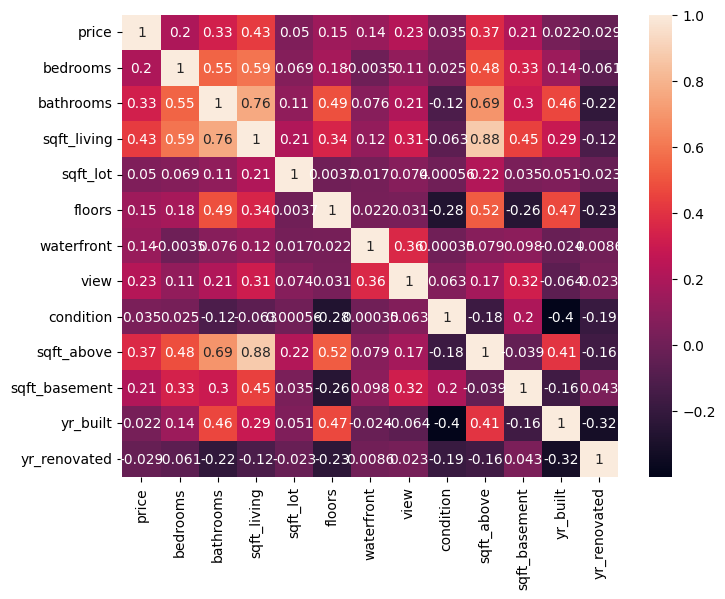

In [45]:
x = df.select_dtypes('number')
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True)

**Find mutual information score**

In [46]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(X, y):
    X.copy()
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    
    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name='Mutual Information', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores
    

## **Training Linear Regression Model**
Let's start train our Linear Regression. First we need split up our data into X array that contain the features and y array is the target variable

In [47]:
X = df.drop(columns=['price'])
y = df[['price']]

mi_score = make_mi_score(X, y)
mi_score

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


street           1.187259
statezip         0.453802
city             0.315389
sqft_living      0.298434
sqft_above       0.200396
bathrooms        0.184815
sqft_lot         0.145104
bedrooms         0.080524
yr_built         0.075527
floors           0.053934
view             0.050866
sqft_basement    0.046252
yr_renovated     0.011067
waterfront       0.005997
date             0.005088
condition        0.001126
country          0.000000
Name: Mutual Information, dtype: float64

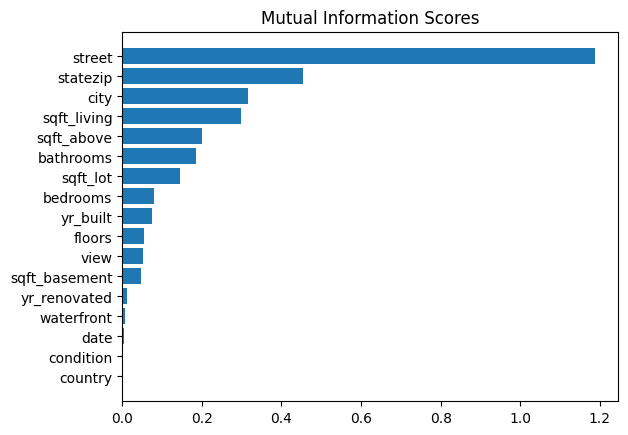

In [48]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plot_mi_scores(mi_score)

turns out street have highest correlation with the price

Redifine data based on mutual information score

In [49]:
df = df[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot']]
df

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630


In [50]:
df.join(y)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.130000e+05
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,2.384000e+06
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.420000e+05
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,4.200000e+05
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,5.500000e+05
...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360,3.081667e+05
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573,5.343333e+05
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014,4.169042e+05
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630,2.034000e+05


In [51]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [52]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['street','statezip','city'], m=0.5)

X = encoder.fit_transform(X, y)
X

,street,statezip,city,sqft_living,sqft_above,bathrooms
0,10225.505362,6862.879765,9125.645814,1340,1340,1.50
1,10984.172029,4278.086021,5329.652531,3650,3370,2.50
2,12915.505362,18250.092120,15156.103817,1930,1930,2.00
3,10304.172029,10533.153625,13743.117829,2000,1000,2.25
4,11950.838696,11315.212236,23916.905554,1940,1140,2.50
...,...,...,...,...,...,...
4595,9190.838696,6862.879765,5329.652531,1510,1510,1.75
4596,9999.505362,13647.348305,13743.117829,1460,1460,2.50
4597,9626.838696,15887.091625,14556.419959,3010,3010,2.50
4598,9370.838696,8715.318344,5329.652531,2090,1070,2.00


### **Train Test Split**
Now we need to split out data into train and test set. We will train the model using training set and test our data using the test set.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values, test_size=0.4, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
model.score(X_train,y_train)

0.9998030938404766

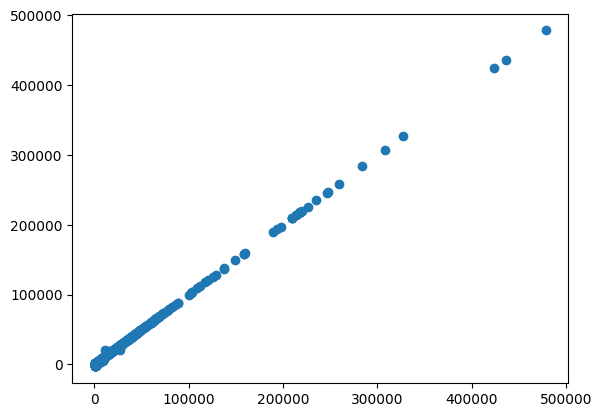

In [56]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

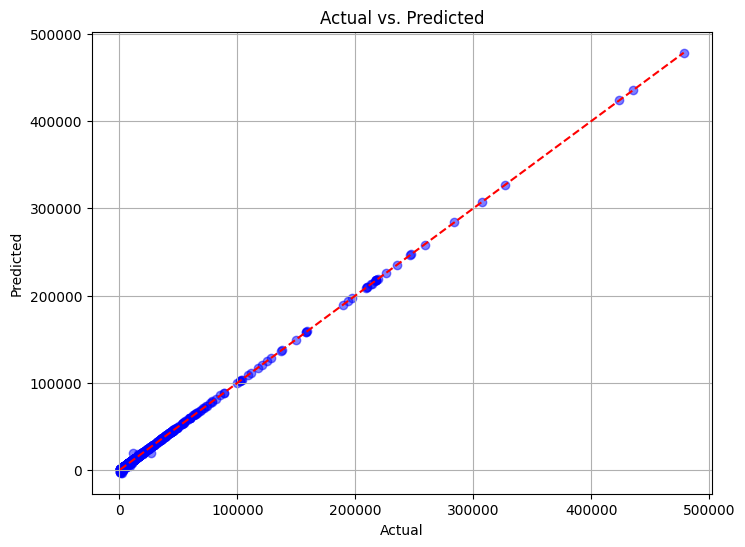

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))
print(np.mean(cvs))


Accuracy: 99.97 %
0.9996541931902077


In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_squared_error(y_test, predictions))

MAE: 230679.89675691377
